## Neural Networks Assignment- Q1

#### Q. PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
#!pip install tensorflow
#!pip install keras

In [2]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense

In [3]:
#Read the data
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
#Describing the data
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#columns
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
#data dimentions
data.shape

(517, 31)


In [7]:
#Infoormation about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
#Splitting the data
X = data.iloc[:,2:30]
print(X.shape)
X.head()

(517, 28)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
y = data.iloc[:,-1:]
y.head()

,size_category
0,small
1,small
2,small
3,small
4,small


#### Standardizing the data

In [10]:
sc= StandardScaler()
data_uni = sc.fit_transform(X)
data_uni

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

#### Using the PCA method to extract the most useful features

In [11]:
pca= PCA(n_components = 28)
pca_values = pca.fit_transform(data_uni)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02, -1.63123746e-15, -1.82952040e-15],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -1.84709097e-15, -2.24485215e-15],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02, -1.14677888e-16,  6.72764002e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -8.04607326e-16,  9.20686618e-17],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02, -9.63587139e-17,  9.54746883e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  1.02062130e-16,  1.37345570e-17]])

In [12]:
#Varience
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 4.57046932e-33])

In [13]:
var_1 = np.cumsum(np.round(var,decimals=4)*100)
var_1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

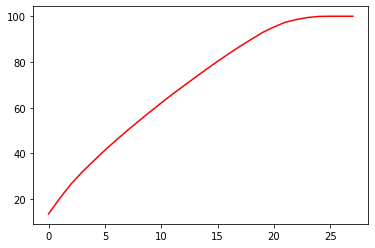

In [14]:
#Plotting the varience
plt.plot(var_1,color= 'red')

### From the above plot we have considered that 20 PCA features are good enought to build the best model

In [15]:
#Creating a data frame out of the new PCA features
data_final=pd.concat([pd.DataFrame(pca_values[:,0:20],
                    columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                'pc15','pc16','pc17','pc18','pc19','pc20']),
                      y], axis = 1)
data_final.size_category.replace(('small','large'),(0,1),inplace=True)
data_final.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,1.234550,0.276198,-0.671216,-0.529599,-0.197543,-0.021839,0.688958,0.563603,-0.439596,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-0.568255,2.095225,1.417634,-0.879983,-2.503167,0.499649,0.563706,-0.703319,-1.535718,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-0.601439,1.998004,1.477351,-0.946682,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,1.019492,0.576990,-0.752744,0.349346,-0.040887,0.017843,0.332572,1.164745,-1.632741,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,1.131879,-0.137990,-0.823316,0.402298,0.844431,1.014944,-0.618231,0.822853,-1.794109,0


In [16]:
#split the data into x and y
array=data_final.values
X_array=array[:,0:20]
y_array=array[:,20]

### Defining and fitting the various models

### Iteration- 1 (Base_model)

In [17]:
#building model
model = Sequential()
model.add(Dense(20,input_dim= 20, kernel_initializer='uniform', activation = 'tanh'))
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Fit the model
model.fit(X_array, y_array, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 27ms/step - loss: 0.6877 - accuracy: 0.7572 - val_loss: 0.6841 - val_accuracy: 0.6784
Epoch 2/250
35/35 [==============================] - 1s 20ms/step - loss: 0.6630 - accuracy: 0.7572 - val_loss: 0.6550 - val_accuracy: 0.6784
Epoch 3/250
35/35 [==============================] - 0s 14ms/step - loss: 0.5837 - accuracy: 0.7572 - val_loss: 0.6247 - val_accuracy: 0.6784
Epoch 4/250
35/35 [==============================] - 1s 19ms/step - loss: 0.5209 - accuracy: 0.7572 - val_loss: 0.6457 - val_accuracy: 0.6784
Epoch 5/250
35/35 [==============================] - 1s 15ms/step - loss: 0.5015 - accuracy: 0.7572 - val_loss: 0.6466 - val_accuracy: 0.6784
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.7572 - val_loss: 0.6554 - val_accuracy: 0.6784
Epoch 7/250
35/35 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.7572 - val_loss: 0.6534 - val_accuracy: 0.6784
Epoch 8/

Epoch 59/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1993 - accuracy: 0.9393 - val_loss: 1.2952 - val_accuracy: 0.8187
Epoch 60/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1935 - accuracy: 0.9566 - val_loss: 1.3074 - val_accuracy: 0.8304
Epoch 61/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1781 - accuracy: 0.9451 - val_loss: 1.3421 - val_accuracy: 0.8304
Epoch 62/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1803 - accuracy: 0.9451 - val_loss: 1.3821 - val_accuracy: 0.8421
Epoch 63/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1759 - accuracy: 0.9509 - val_loss: 1.4480 - val_accuracy: 0.8421
Epoch 64/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.9509 - val_loss: 1.4452 - val_accuracy: 0.8246
Epoch 65/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9624 - val_loss: 1.5398 - val_accuracy: 0.8246
Epoch 

35/35 [==============================] - 0s 7ms/step - loss: 0.0592 - accuracy: 0.9798 - val_loss: 5.1444 - val_accuracy: 0.8596
Epoch 174/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9798 - val_loss: 5.0167 - val_accuracy: 0.8830
Epoch 175/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0803 - accuracy: 0.9798 - val_loss: 5.3218 - val_accuracy: 0.8596
Epoch 176/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0789 - accuracy: 0.9798 - val_loss: 5.2929 - val_accuracy: 0.8363
Epoch 177/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1309 - accuracy: 0.9624 - val_loss: 5.0014 - val_accuracy: 0.8596
Epoch 178/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0954 - accuracy: 0.9653 - val_loss: 5.1038 - val_accuracy: 0.8480
Epoch 179/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0992 - accuracy: 0.9711 - val_loss: 5.0369 - val_accuracy: 0.8480
Epoch 180/250

In [20]:
#Evaluating the best value
scores=model.evaluate(X_array,y_array)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 1.9653 - accuracy: 0.9497
accuracy: 94.97%


### Iteration- 2 (Model_1)

In [21]:
# Building another model with different features
model_1 = Sequential()
model_1.add(Dense(20,input_dim= 20, kernel_initializer='uniform', activation = 'sigmoid'))
model_1.add(Dense(10, kernel_initializer='uniform', activation='sigmoid'))
model_1.add(Dense(5, kernel_initializer='uniform', activation='relu'))
model_1.add(Dense(1, kernel_initializer='uniform', activation='relu'))

In [22]:
# Compile model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Fit the model
model_1.fit(X_array, y_array, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 2s 13ms/step - loss: 1.0383 - accuracy: 0.7572 - val_loss: 1.1277 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 6ms/step - loss: 0.7747 - accuracy: 0.7572 - val_loss: 0.9168 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 6ms/step - loss: 0.6611 - accuracy: 0.7572 - val_loss: 0.7838 - val_accuracy: 0.6784
Epoch 4/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5965 - accuracy: 0.7572 - val_loss: 0.7115 - val_accuracy: 0.6784
Epoch 5/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7572 - val_loss: 0.6755 - val_accuracy: 0.6784
Epoch 6/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5551 - accuracy: 0.7572 - val_loss: 0.6571 - val_accuracy: 0.6784
Epoch 7/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5512 - accuracy: 0.7572 - val_loss: 0.6502 - val_accuracy: 0.6784
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5141 - accuracy: 0.7572 - val_loss: 0.6137 - val_accuracy: 0.6784
Epoch 60/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.7572 - val_loss: 0.6141 - val_accuracy: 0.6784
Epoch 61/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5106 - accuracy: 0.7572 - val_loss: 0.6176 - val_accuracy: 0.6784
Epoch 62/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5087 - accuracy: 0.7572 - val_loss: 0.6125 - val_accuracy: 0.6784
Epoch 63/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5076 - accuracy: 0.7572 - val_loss: 0.6107 - val_accuracy: 0.6784
Epoch 64/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5049 - accuracy: 0.7572 - val_loss: 0.6114 - val_accuracy: 0.6784
Epoch 65/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5031 - accuracy: 0.7572 - val_loss: 0.6078 - val_accuracy: 0.6784
Epoch 

In [24]:
# Accuracy of the model
scores_1=model_1.evaluate(X_array,y_array)
print("%s: %.2f%%" % (model_1.metrics_names[1], scores_1[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8491
accuracy: 84.91%


### Iteration- 3(Model-2)

In [25]:
# Building another model with different features
model_2 = Sequential()
model_2.add(Dense(12,input_dim= 20, kernel_initializer='uniform', activation = 'sigmoid'))
model_2.add(Dense(6, kernel_initializer='uniform', activation='sigmoid'))
model_2.add(Dense(3, kernel_initializer='uniform', activation='relu'))
model_2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [26]:
# Compile model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Fit the model
model_2.fit(X_array, y_array, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 12ms/step - loss: 0.6885 - accuracy: 0.7572 - val_loss: 0.6863 - val_accuracy: 0.6784
Epoch 2/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6774 - accuracy: 0.7572 - val_loss: 0.6771 - val_accuracy: 0.6784
Epoch 3/200
35/35 [==============================] - 0s 7ms/step - loss: 0.6606 - accuracy: 0.7572 - val_loss: 0.6646 - val_accuracy: 0.6784
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 0.6383 - accuracy: 0.7572 - val_loss: 0.6504 - val_accuracy: 0.6784
Epoch 5/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6145 - accuracy: 0.7572 - val_loss: 0.6370 - val_accuracy: 0.6784
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.7572 - val_loss: 0.6293 - val_accuracy: 0.6784
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 0.5732 - accuracy: 0.7572 - val_loss: 0.6259 - val_accuracy: 0.6784
Epoch 8/200


Epoch 59/200
35/35 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7572 - val_loss: 0.6263 - val_accuracy: 0.6784
Epoch 60/200
35/35 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.7572 - val_loss: 0.6240 - val_accuracy: 0.6784
Epoch 61/200
35/35 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.7572 - val_loss: 0.6246 - val_accuracy: 0.6784
Epoch 62/200
35/35 [==============================] - 0s 4ms/step - loss: 0.4998 - accuracy: 0.7572 - val_loss: 0.6260 - val_accuracy: 0.6784
Epoch 63/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4995 - accuracy: 0.7572 - val_loss: 0.6212 - val_accuracy: 0.6784
Epoch 64/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7572 - val_loss: 0.6240 - val_accuracy: 0.6784
Epoch 65/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.7572 - val_loss: 0.6208 - val_accuracy: 0.6784
Epoch 

35/35 [==============================] - 0s 6ms/step - loss: 0.3387 - accuracy: 0.8757 - val_loss: 0.4705 - val_accuracy: 0.8070
Epoch 174/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3362 - accuracy: 0.8699 - val_loss: 0.4719 - val_accuracy: 0.8129
Epoch 175/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3359 - accuracy: 0.8728 - val_loss: 0.4702 - val_accuracy: 0.8129
Epoch 176/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3347 - accuracy: 0.8728 - val_loss: 0.4701 - val_accuracy: 0.8129
Epoch 177/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3343 - accuracy: 0.8699 - val_loss: 0.4680 - val_accuracy: 0.8129
Epoch 178/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8728 - val_loss: 0.4687 - val_accuracy: 0.8129
Epoch 179/200
35/35 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.8757 - val_loss: 0.4672 - val_accuracy: 0.8012
Epoch 180/200

In [28]:
#Accuracy of the model
scores_2=model_2.evaluate(X_array,y_array)
print("%s: %.2f%%" % (model_2.metrics_names[1], scores_2[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8491
accuracy: 84.91%


### Conclusion:

#### Hence we can conclude that the first model(Base_model) where the accuracy of the model 94.97% is the best model.